<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **SpaceX  Falcon 9 First Stage Landing Prediction**


## Assignment: Exploring and Preparing Data


Estimated time needed: **70** minutes


In this assignment, we will predict if the Falcon 9 first stage will land successfully. SpaceX advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is due to the fact that SpaceX can reuse the first stage.

In this lab, you will perform Exploratory Data Analysis and Feature Engineering.


Falcon 9 first stage will land successfully


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planned. Space X performs a controlled landing in the oceans.


## Objectives

Perform exploratory Data Analysis and Feature Engineering using `Pandas` and `Matplotlib`

*   Exploratory Data Analysis
*   Preparing Data  Feature Engineering


### Import Libraries and Define Auxiliary Functions


We will import the following libraries the lab


In [28]:
import piplite
await piplite.install(['numpy'])
await piplite.install(['pandas'])
await piplite.install(['seaborn'])

In [29]:
# pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

In [ ]:
## Exploratory Data Analysis


First, let's read the SpaceX dataset into a Pandas dataframe and print its summary


In [30]:
from js import fetch
import io

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
resp = await fetch(URL)
dataset_part_2_csv = io.BytesIO((await resp.arrayBuffer()).to_py())
df=pd.read_csv(dataset_part_2_csv)
df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


First, let's try to see how the `FlightNumber` (indicating the continuous launch attempts.) and `Payload` variables would affect the launch outcome.

We can plot out the <code>FlightNumber</code> vs. <code>PayloadMass</code>and overlay the outcome of the launch. We see that as the flight number increases, the first stage is more likely to land successfully. The payload mass is also important; it seems the more massive the payload, the less likely the first stage will return.


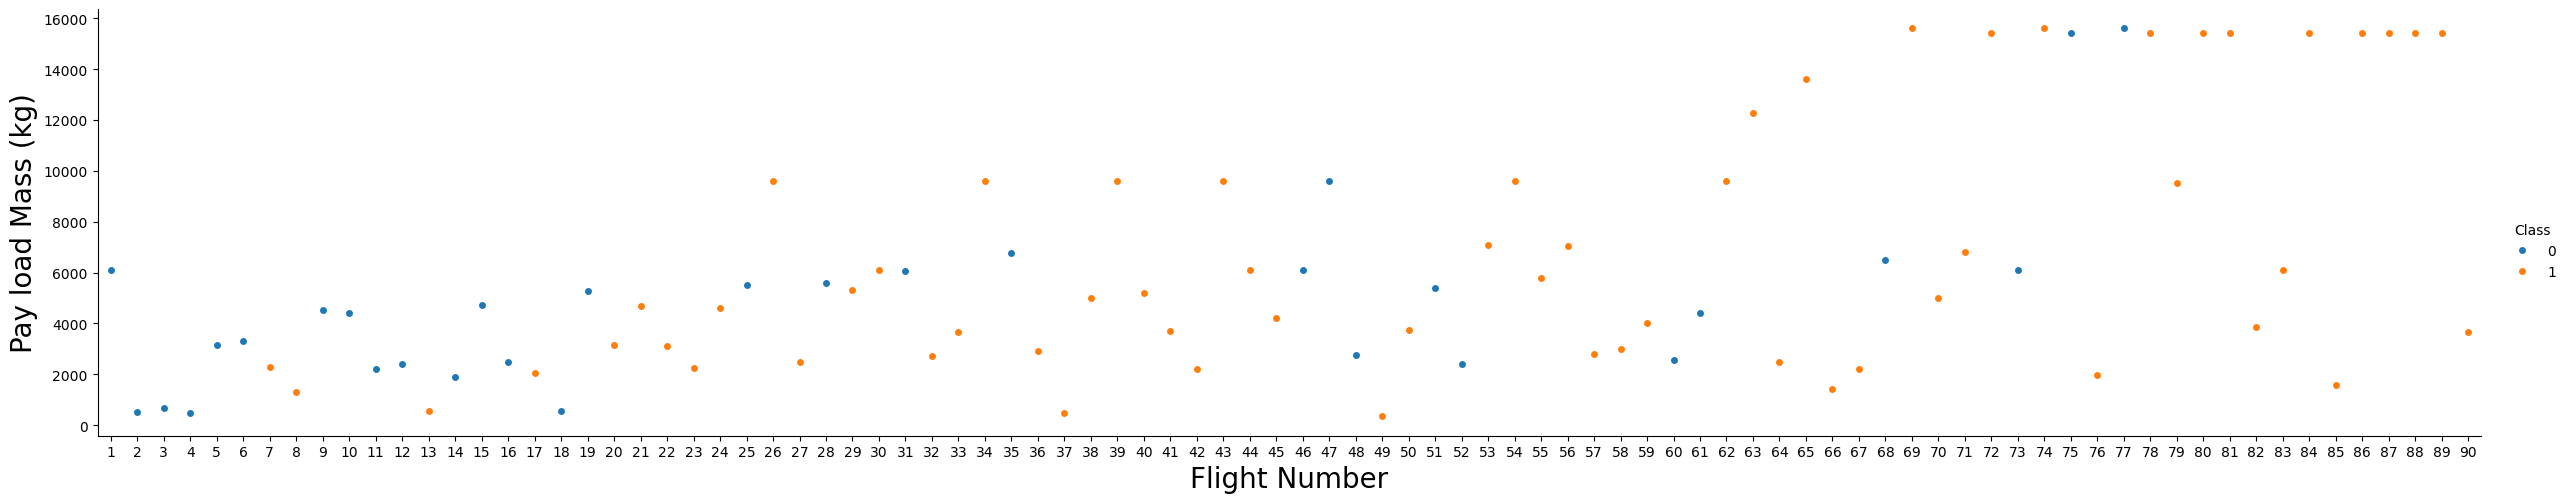

In [31]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

We see that different launch sites have different success rates.  <code>CCAFS LC-40</code>, has a success rate of 60 %, while  <code>KSC LC-39A</code> and <code>VAFB SLC 4E</code> has a success rate of 77%.


Next, let's drill down to each site visualize its detailed launch records.


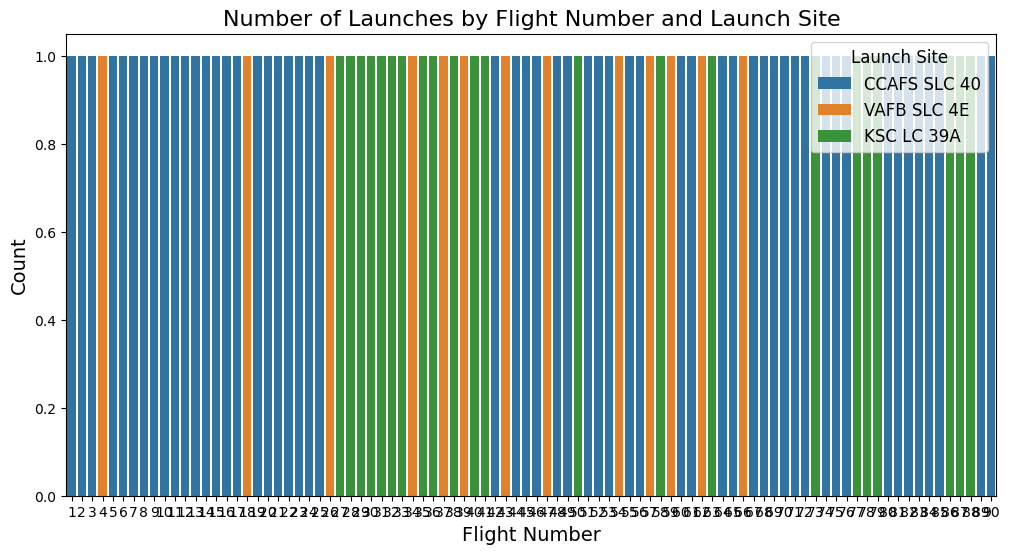

In [32]:
### TASK 1: Visualize the relationship between Flight Number and Launch Site

# Create a count plot
plt.figure(figsize=(12,6))
sns.countplot(x='FlightNumber', hue='LaunchSite', data=df)
plt.xlabel("Flight Number", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.title("Number of Launches by Flight Number and Launch Site", fontsize=16)
plt.legend(title="Launch Site", fontsize=12, title_fontsize=12)
plt.show()

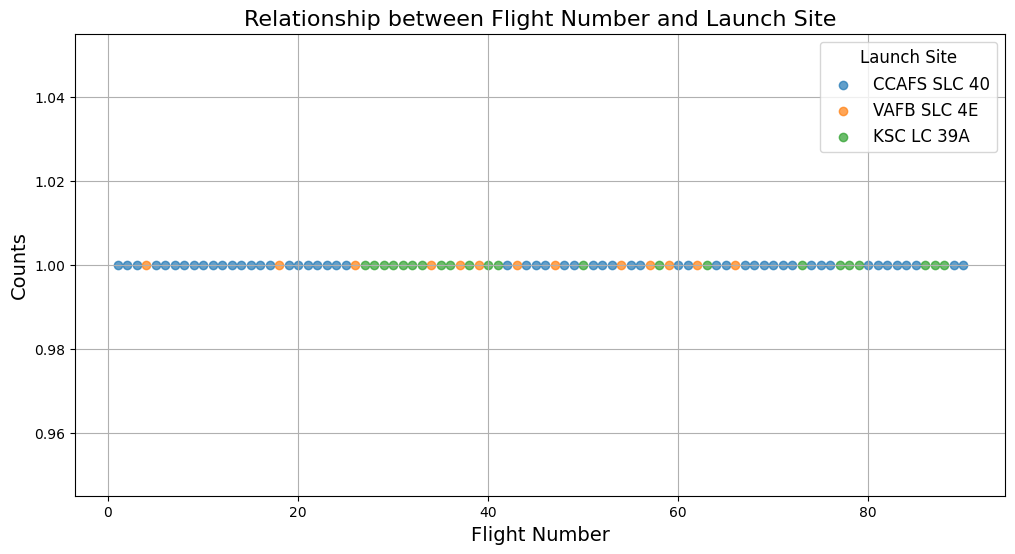

In [6]:
import matplotlib.pyplot as plt

# Group the data by Launch Site and Flight Number
launch_site_groups = df.groupby(['LaunchSite', 'FlightNumber']).size().reset_index(name='Counts')

# Create a scatter plot
plt.figure(figsize=(12, 6))
for site in df['LaunchSite'].unique():
    site_data = launch_site_groups[launch_site_groups['LaunchSite'] == site]
    plt.scatter(site_data['FlightNumber'], site_data['Counts'], label=site, alpha=0.7)

plt.xlabel("Flight Number", fontsize=14)
plt.ylabel("Counts", fontsize=14)
plt.title("Relationship between Flight Number and Launch Site", fontsize=16)
plt.legend(title="Launch Site", fontsize=12, title_fontsize=12)
plt.grid(True)
plt.show()


Use the function <code>catplot</code> to plot <code>FlightNumber</code> vs <code>LaunchSite</code>, set the  parameter <code>x</code>  parameter to <code>FlightNumber</code>,set the  <code>y</code> to <code>Launch Site</code> and set the parameter <code>hue</code> to <code>'class'</code>


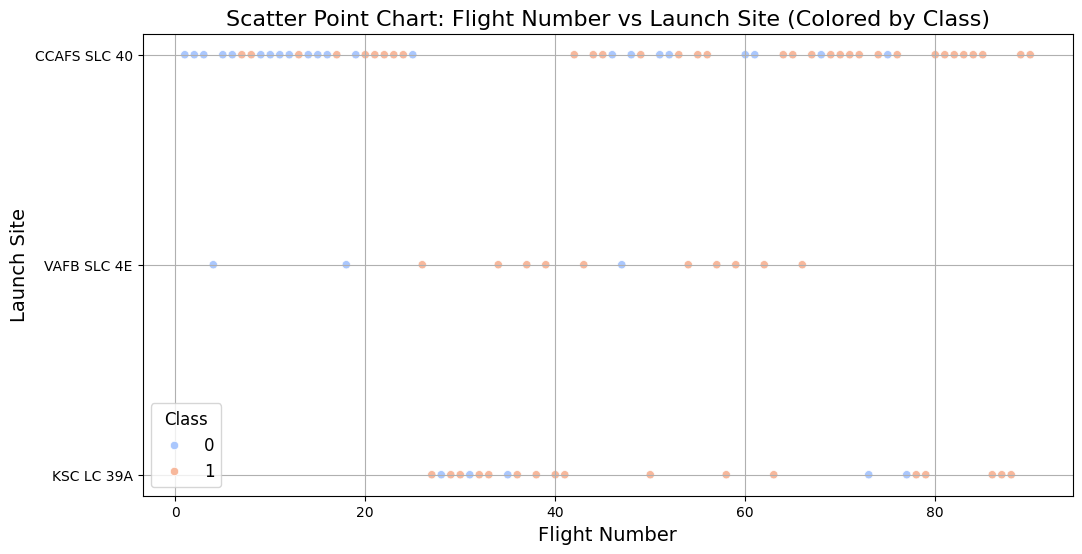

In [10]:
# Plot a scatter point chart with x axis to be Flight Number and y axis to be the launch site, and hue to be the class value
# Create a scatter point chart
plt.figure(figsize=(12,6))
sns.scatterplot(data=df, x='FlightNumber', y='LaunchSite', hue='Class', palette='coolwarm')

plt.xlabel("Flight Number", fontsize=14)
plt.ylabel("Launch Site", fontsize=14)
plt.title("Scatter Point Chart: Flight Number vs Launch Site (Colored by Class)", fontsize=16)
plt.legend(title="Class", fontsize=12, title_fontsize=12)
plt.grid(True)
plt.show()

Now try to explain the patterns you found in the Flight Number vs. Launch Site scatter point plots.


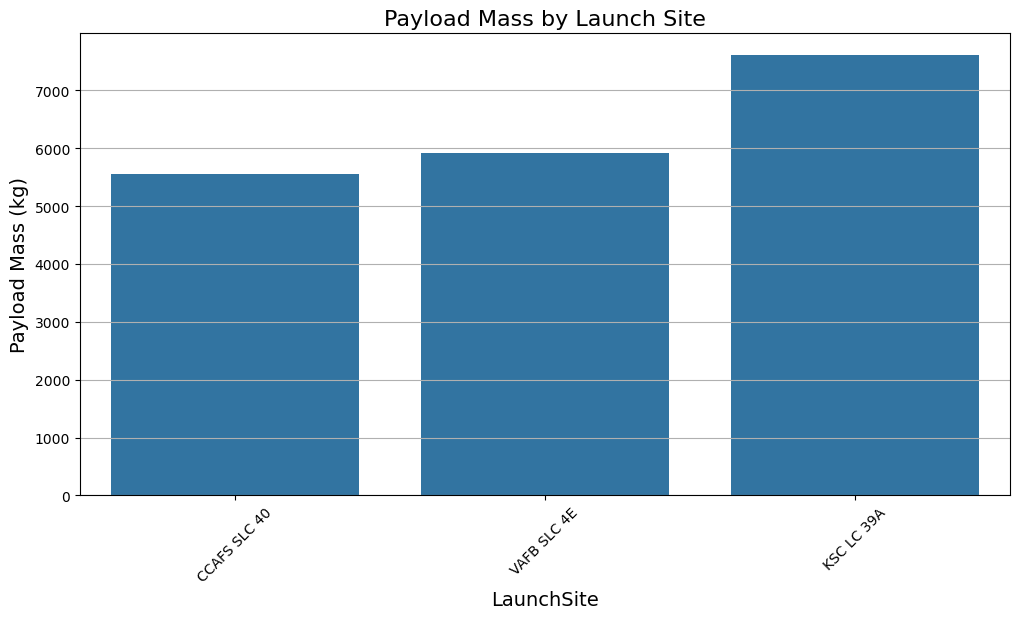

In [33]:
### TASK 2: Visualize the relationship between Payload and Launch Site
import seaborn as sns
import matplotlib.pyplot as plt

# Create a bar plot
plt.figure(figsize=(12,6))
sns.barplot(data=df, x='LaunchSite', y='PayloadMass', errorbar=None)

plt.xlabel("LaunchSite", fontsize=14)
plt.ylabel("Payload Mass (kg)", fontsize=14)
plt.title("Payload Mass by Launch Site", fontsize=16)
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.show()

We also want to observe if there is any relationship between launch sites and their payload mass.


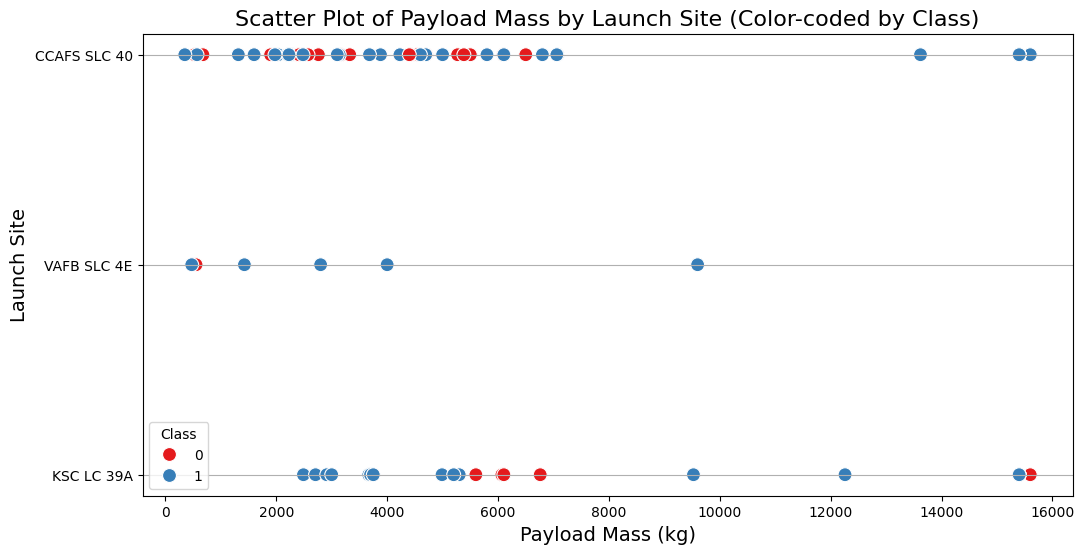

In [16]:
# Plot a scatter point chart with x axis to be Pay Load Mass (kg) and y axis to be the launch site, and hue to be the class value
import seaborn as sns
import matplotlib.pyplot as plt

# Create a scatter point chart
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='PayloadMass', y='LaunchSite', hue='Class', s=100, palette='Set1')

plt.xlabel("Payload Mass (kg)", fontsize=14)
plt.ylabel("Launch Site", fontsize=14)
plt.title("Scatter Plot of Payload Mass by Launch Site (Color-coded by Class)", fontsize=16)
plt.grid(axis='y')
plt.legend(title='Class')
plt.show()

Now if you observe Payload Vs. Launch Site scatter point chart you will find for the VAFB-SLC  launchsite there are no  rockets  launched for  heavypayload mass(greater than 10000).


In [19]:
orbit_success_rate = df.groupby('Orbit')['Class'].mean().reset_index()

In [20]:
orbit_success_rate

,Orbit,Class
0,ES-L1,1.000000
1,GEO,1.000000
2,GTO,0.518519
3,HEO,1.000000
4,ISS,0.619048
5,LEO,0.714286
6,MEO,0.666667
7,PO,0.666667
8,SO,0.000000
9,SSO,1.000000


<ipython-input-21-db56e960825c>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=orbit_success_rate, x='Orbit', y='Class', palette='Set1')


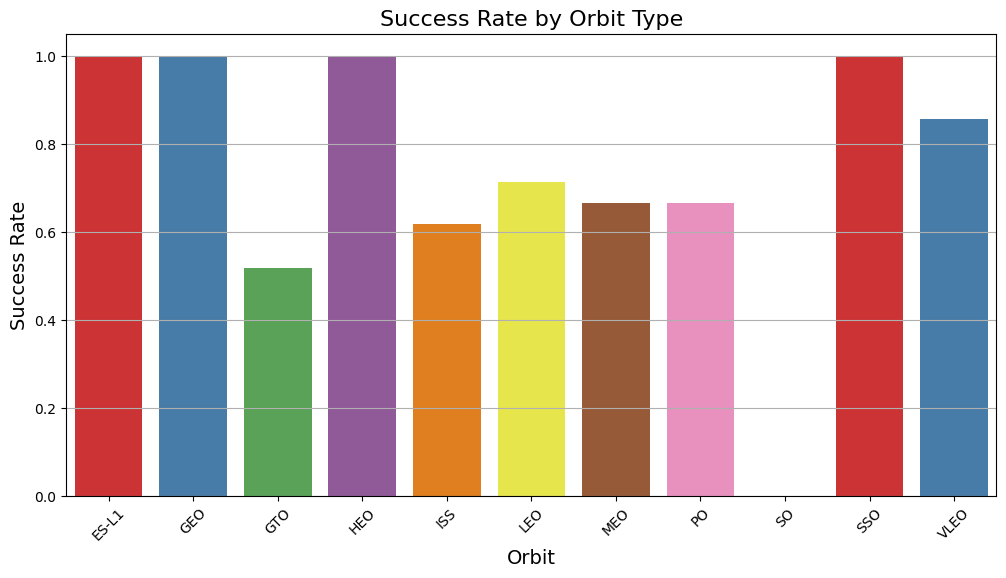

In [21]:
### TASK  3: Visualize the relationship between success rate of each orbit type
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the success rate for each orbit type
orbit_success_rate = df.groupby('Orbit')['Class'].mean().reset_index()

# Create a bar plot
plt.figure(figsize=(12,6))
sns.barplot(data=orbit_success_rate, x='Orbit', y='Class', palette='Set1')
plt.xlabel("Orbit", fontsize=14)
plt.ylabel("Success Rate", fontsize=14)
plt.title("Success Rate by Orbit Type", fontsize=16)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

Next, we want to visually check if there are any relationship between success rate and orbit type.


Let's create a `bar chart` for the sucess rate of each orbit


<ipython-input-22-1eed99221518>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Orbit', y='Class', data=orbit_success_rate, palette='viridis')


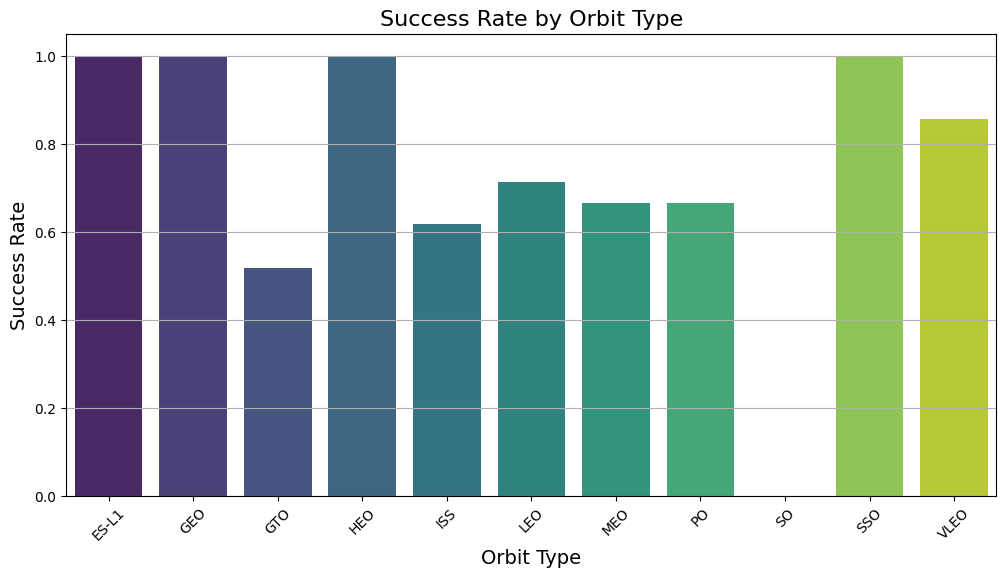

In [22]:
# HINT use groupby method on Orbit column and get the mean of Class column
import seaborn as sns
import matplotlib.pyplot as plt

# Group the data by orbit type and calculate the mean success rate
orbit_success_rate = df.groupby('Orbit')['Class'].mean().reset_index()

# Create a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='Orbit', y='Class', data=orbit_success_rate, palette='viridis')
plt.xlabel('Orbit Type', fontsize=14)
plt.ylabel('Success Rate', fontsize=14)
plt.title('Success Rate by Orbit Type', fontsize=16)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


Analyze the ploted bar chart try to find which orbits have high sucess rate.


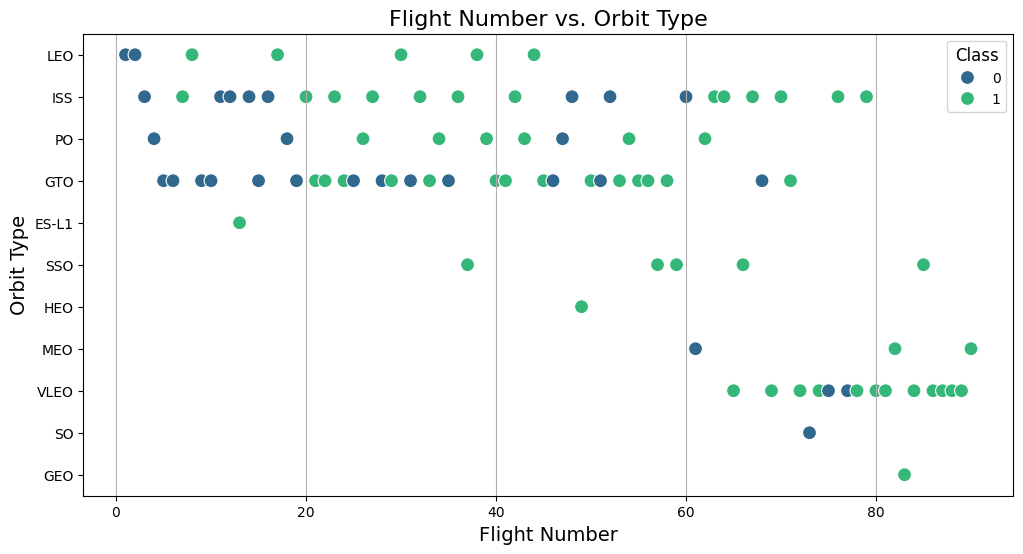

In [27]:
### TASK  4: Visualize the relationship between FlightNumber and Orbit type
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.scatterplot(x='FlightNumber', y='Orbit', data=df, hue='Class', palette='viridis', s=100)
plt.xlabel('Flight Number', fontsize=14)
plt.ylabel('Orbit Type', fontsize=14)
plt.title('Flight Number vs. Orbit Type', fontsize=16)
plt.legend(title='Class', title_fontsize=12)
plt.grid(axis='x')
plt.show()

For each orbit, we want to see if there is any relationship between FlightNumber and Orbit type.


In [34]:
# Plot a scatter point chart with x axis to be FlightNumber and y axis to be the Orbit, and hue to be the class value

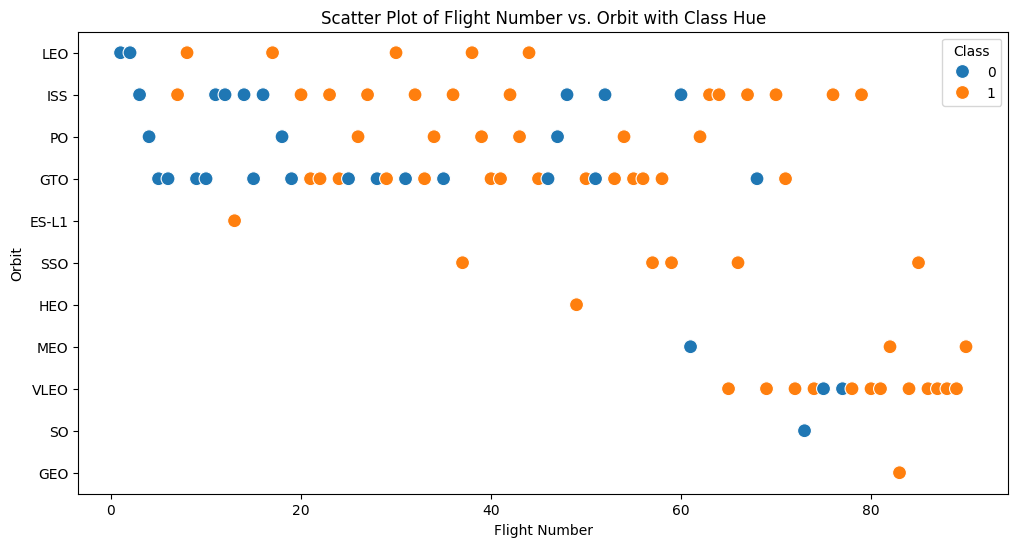

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot a scatter point chart
plt.figure(figsize=(12, 6))
scatter_plot = sns.scatterplot(x="FlightNumber", y="Orbit", hue="Class", data=df, s=100)

# Customize the plot
scatter_plot.set(xlabel="Flight Number", ylabel="Orbit")
plt.title("Scatter Plot of Flight Number vs. Orbit with Class Hue")

# Show the plot
plt.legend(title="Class")
plt.show()


You should see that in the LEO orbit the Success appears related to the number of flights; on the other hand, there seems to be no relationship between flight number when in GTO orbit.


<ipython-input-38-1254609cd5aa>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  bar_plot = sns.barplot(x="Orbit", y="PayloadMass", data=df, ci=None)


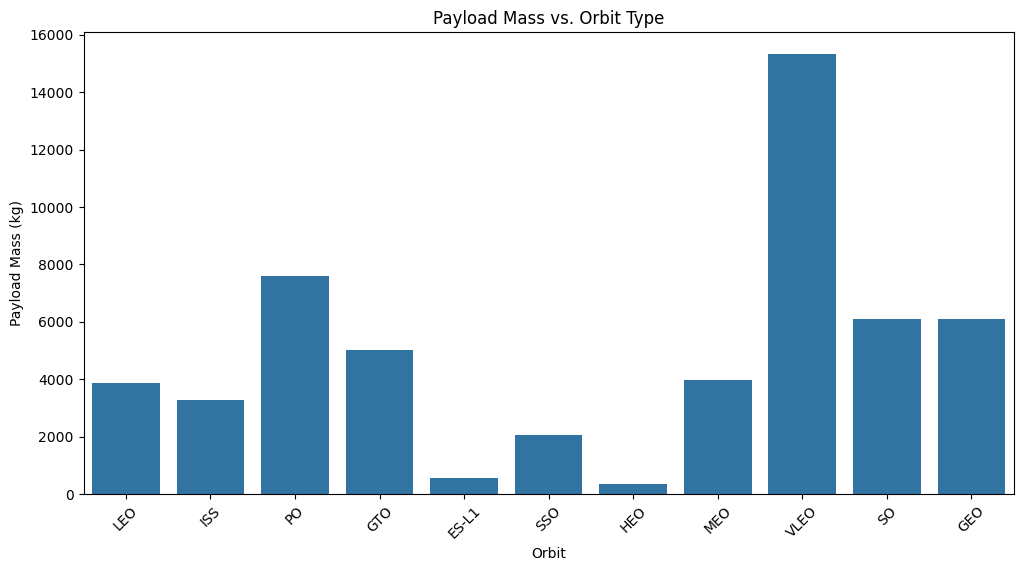

In [38]:
### TASK  5: Visualize the relationship between Payload and Orbit type
plt.figure(figsize=(12,6))
bar_plot = sns.barplot(x="Orbit", y="PayloadMass", data=df, ci=None)

bar_plot.set(xlabel="Orbit", ylabel="Payload Mass (kg)")
plt.title("Payload Mass vs. Orbit Type")

plt.xticks(rotation=45)

plt.show()

Similarly, we can plot the Payload vs. Orbit scatter point charts to reveal the relationship between Payload and Orbit type


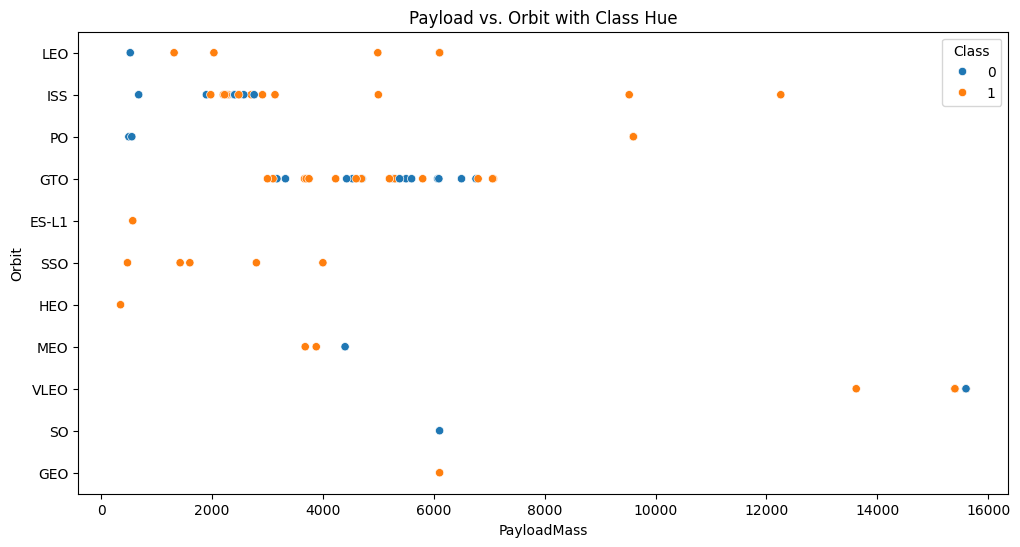

In [42]:
# Plot a scatter point chart with x axis to be Payload and y axis to be the Orbit, and hue to be the class value
plt.figure(figsize=(12,6))
bar_plot = sns.scatterplot(x="PayloadMass", y="Orbit", hue="Class", data=df)

scatter_plot.set(xlabel="Payload Mass (kg)", ylabel="Orbit")
plt.title("Payload vs. Orbit with Class Hue")

plt.legend(title="Class", loc="upper right")
plt.show()

With heavy payloads the successful landing or positive landing rate are more for Polar,LEO and ISS.

However for GTO we cannot distinguish this well as both positive landing rate and negative landing(unsuccessful mission) are both there here.


In [43]:
### TASK  6: Visualize the launch success yearly trend
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


<Figure size 1200x600 with 0 Axes>

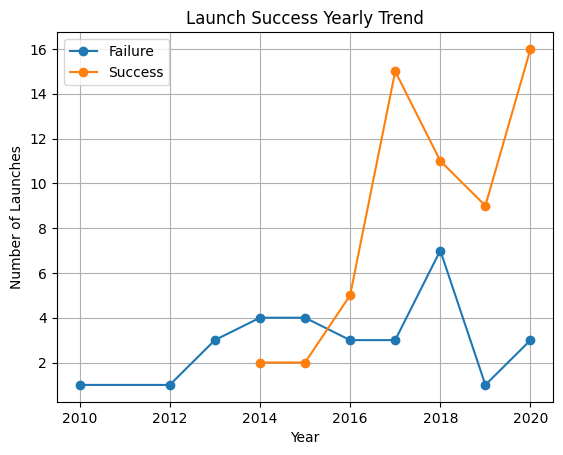

In [48]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract the year from the 'Date' column
df['Year'] = df['Date'].dt.year

# Group the data by year and Class (success/failure)
yearly_trend = df.groupby(['Year', 'Class']).size().unstack()

# Create a line plot
plt.figure(figsize=(12, 6))
yearly_trend.plot(kind='line', marker='o')
plt.title('Launch Success Yearly Trend')
plt.xlabel('Year')
plt.ylabel('Number of Launches')
plt.legend(['Failure', 'Success'], loc='upper left')
plt.grid(True)
plt.show()

You can plot a line chart with x axis to be <code>Year</code> and y axis to be average success rate, to get the average launch success trend.


The function will help you get the year from the date:


In [49]:
# A function to Extract years from the date 
year=[]
def Extract_year():
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year
Extract_year()
df['Date'] = year
df.head()
    

<class 'AttributeError'>: 'Timestamp' object has no attribute 'split'

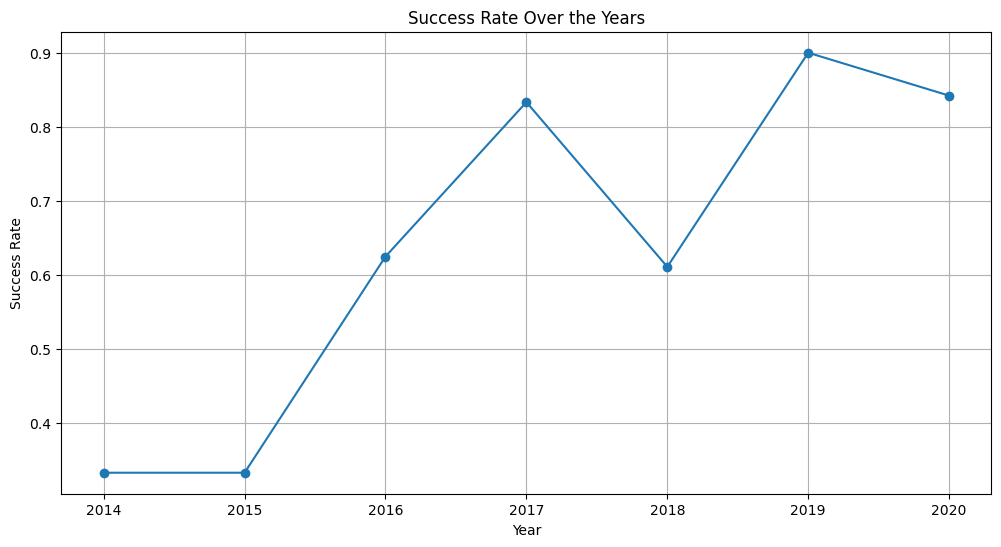

In [51]:
# Plot a line chart with x axis to be the extracted year and y axis to be the success rate
import matplotlib.pyplot as plt
import pandas as pd

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract the year from the 'Date' column
df['Year'] = df['Date'].dt.year

# Group the data by year and calculate success rate
yearly_success_rate = df[df['Class'] == 1].groupby('Year').size() / df.groupby('Year').size()
yearly_success_rate = df[df['Class'] == 1].groupby('Year').size() / df.groupby('Year').size()

# Create a line plot for success rate
plt.figure(figsize=(12, 6))
plt.plot(yearly_success_rate.index, yearly_success_rate.values, marker='o', linestyle='-')
plt.title('Success Rate Over the Years')
plt.xlabel('Year')
plt.ylabel('Success Rate')
plt.grid(True)
plt.show()


you can observe that the sucess rate since 2013 kept increasing till 2020


In [ ]:
## Features Engineering


By now, you should obtain some preliminary insights about how each important variable would affect the success rate, we will select the features that will be used in success prediction in the future module.


In [52]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


In [53]:
### TASK  7: Create dummy variables to categorical columns
# Specify the categorical columns for which you want to create dummy variables
categorical_columns = ['Orbit', 'LaunchSite', 'LandingPad', 'Block', 'Serial']

# Create dummy variables for the categorical columns
dummy_df = pd.get_dummies(features, columns=categorical_columns, drop_first=True)

# Display the resulting DataFrame with dummy variables
print(dummy_df.head())

   FlightNumber  PayloadMass  Flights  GridFins  Reused   Legs  ReusedCount  \
0             1  6104.959412        1     False   False  False            0   
1             2   525.000000        1     False   False  False            0   
2             3   677.000000        1     False   False  False            0   
3             4   500.000000        1     False   False  False            0   
4             5  3170.000000        1     False   False  False            0   

   Orbit_GEO  Orbit_GTO  Orbit_HEO  ...  Serial_B1048  Serial_B1049  \
0          0          0          0  ...             0             0   
1          0          0          0  ...             0             0   
2          0          0          0  ...             0             0   
3          0          0          0  ...             0             0   
4          0          1          0  ...             0             0   

   Serial_B1050  Serial_B1051  Serial_B1054  Serial_B1056  Serial_B1058  \
0             0        

In [54]:
# Specify the categorical columns for which you want to create dummy variables
categorical_columns = ['Orbit', 'LaunchSite', 'LandingPad', 'Block', 'Serial']

# Create dummy variables for the categorical columns
dummy_df = pd.get_dummies(features, columns=categorical_columns, drop_first=True)

# Display the resulting DataFrame with dummy variables
print(dummy_df.head())

   FlightNumber  PayloadMass  Flights  GridFins  Reused   Legs  ReusedCount  \
0             1  6104.959412        1     False   False  False            0   
1             2   525.000000        1     False   False  False            0   
2             3   677.000000        1     False   False  False            0   
3             4   500.000000        1     False   False  False            0   
4             5  3170.000000        1     False   False  False            0   

   Orbit_GEO  Orbit_GTO  Orbit_HEO  ...  Serial_B1048  Serial_B1049  \
0          0          0          0  ...             0             0   
1          0          0          0  ...             0             0   
2          0          0          0  ...             0             0   
3          0          0          0  ...             0             0   
4          0          1          0  ...             0             0   

   Serial_B1050  Serial_B1051  Serial_B1054  Serial_B1056  Serial_B1058  \
0             0        

Use the function <code>get_dummies</code> and <code>features</code> dataframe to apply OneHotEncoder to the column <code>Orbits</code>, <code>LaunchSite</code>, <code>LandingPad</code>, and <code>Serial</code>. Assign the value to the variable <code>features_one_hot</code>, display the results using the method head. Your result dataframe must include all features including the encoded ones.


In [55]:
# HINT: Use get_dummies() function on the categorical columns
# Specify the categorical columns for which you want to apply one-hot encoding
categorical_columns = ['Orbit', 'LaunchSite', 'LandingPad', 'Serial']

# Apply one-hot encoding using get_dummies
features_one_hot = pd.get_dummies(features, columns=categorical_columns, drop_first=True)

# Display the resulting DataFrame with one-hot encoded features
print(features_one_hot.head())

   FlightNumber  PayloadMass  Flights  GridFins  Reused   Legs  Block  \
0             1  6104.959412        1     False   False  False    1.0   
1             2   525.000000        1     False   False  False    1.0   
2             3   677.000000        1     False   False  False    1.0   
3             4   500.000000        1     False   False  False    1.0   
4             5  3170.000000        1     False   False  False    1.0   

   ReusedCount  Orbit_GEO  Orbit_GTO  ...  Serial_B1048  Serial_B1049  \
0            0          0          0  ...             0             0   
1            0          0          0  ...             0             0   
2            0          0          0  ...             0             0   
3            0          0          0  ...             0             0   
4            0          0          1  ...             0             0   

   Serial_B1050  Serial_B1051  Serial_B1054  Serial_B1056  Serial_B1058  \
0             0             0             0    

In [57]:
### TASK  8: Cast all numeric columns to `float64`
# Identify numeric columns in the DataFrame
numeric_columns = features_one_hot.select_dtypes(include=['int64', 'int32', 'float64']).columns
numeric_columns = features_one_hot.select_dtypes(include=['int64', 'int32', 'float64']).columns

# Cast the identified numeric columns to float64
features_one_hot[numeric_columns] = features_one_hot[numeric_columns].astype('float64')
features_one_hot[numeric_columns] = features_one_hot[numeric_columns].astype('float64')

# Display the DataFrame with numeric columns cast to float64
print(features_one_hot.head())
print(features_one_hot.head())


   FlightNumber  PayloadMass  Flights  GridFins  Reused   Legs  Block  \
0           1.0  6104.959412      1.0     False   False  False    1.0   
1           2.0   525.000000      1.0     False   False  False    1.0   
2           3.0   677.000000      1.0     False   False  False    1.0   
3           4.0   500.000000      1.0     False   False  False    1.0   
4           5.0  3170.000000      1.0     False   False  False    1.0   

   ReusedCount  Orbit_GEO  Orbit_GTO  ...  Serial_B1048  Serial_B1049  \
0          0.0          0          0  ...             0             0   
1          0.0          0          0  ...             0             0   
2          0.0          0          0  ...             0             0   
3          0.0          0          0  ...             0             0   
4          0.0          0          1  ...             0             0   

   Serial_B1050  Serial_B1051  Serial_B1054  Serial_B1056  Serial_B1058  \
0             0             0             0    

Now that our <code>features_one_hot</code> dataframe only contains numbers cast the entire dataframe to variable type <code>float64</code>


In [58]:
# HINT: use astype function
# Cast the entire DataFrame to float64
features_one_hot = features_one_hot.astype('float64')
features_one_hot = features_one_hot.astype('float64')

# Display the modified DataFrame
print(features_one_hot.head())
print(features_one_hot.head())



   FlightNumber  PayloadMass  Flights  GridFins  Reused  Legs  Block  \
0           1.0  6104.959412      1.0       0.0     0.0   0.0    1.0   
1           2.0   525.000000      1.0       0.0     0.0   0.0    1.0   
2           3.0   677.000000      1.0       0.0     0.0   0.0    1.0   
3           4.0   500.000000      1.0       0.0     0.0   0.0    1.0   
4           5.0  3170.000000      1.0       0.0     0.0   0.0    1.0   

   ReusedCount  Orbit_GEO  Orbit_GTO  ...  Serial_B1048  Serial_B1049  \
0          0.0        0.0        0.0  ...           0.0           0.0   
1          0.0        0.0        0.0  ...           0.0           0.0   
2          0.0        0.0        0.0  ...           0.0           0.0   
3          0.0        0.0        0.0  ...           0.0           0.0   
4          0.0        0.0        1.0  ...           0.0           0.0   

   Serial_B1050  Serial_B1051  Serial_B1054  Serial_B1056  Serial_B1058  \
0           0.0           0.0           0.0          

In [59]:
features_one_hot.to_csv('dataset_part_3.csv', index=False)

We can now export it to a <b>CSV</b> for the next section,but to make the answers consistent, in the next lab we will provide data in a pre-selected date range.


<code>features_one_hot.to_csv('dataset_part\_3.csv', index=False)</code>


## Authors


[Pratiksha Verma](https://www.linkedin.com/in/pratiksha-verma-6487561b1/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork865-2022-01-01)


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By      | Change Description      |
| ----------------- | ------- | -------------   | ----------------------- |
| 2022-11-09        | 1.0     | Pratiksha Verma | Converted initial version to Jupyterlite|


### <h3 align="center"> IBM Corporation 2022. All rights reserved. <h3/>
